In [ ]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [ ]:
# dataDir='./COCOdataset2017'
# dataType='val'
annFile='/content/merged_file.json'

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

print(cats)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[{'id': 1, 'name': 'FaceMask', 'supercategory': ''}]


Number of images containing all the  classes: 2


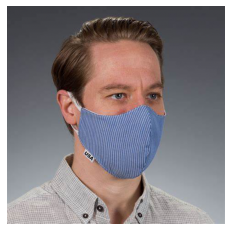

In [ ]:
filterClasses = ['FaceMask']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread('{}'.format(img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show()

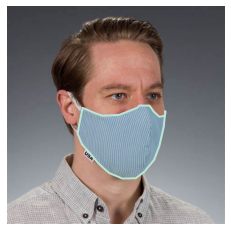

In [ ]:
# Load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [ ]:
def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"
print('The class name is', getClassName(1, cats)) # only 1 will give FaceMask since only 1 class is available

The class name is FaceMask


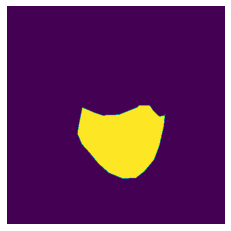

In [ ]:
filterClasses = ['FaceMask']
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    className = getClassName(anns[i]['category_id'], cats)
    pixel_value = filterClasses.index(className)+1
    mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
plt.axis('off')
plt.imshow(mask)

# IMP Save target Binary segmentation maps from the face mask images 

In [ ]:
from skimage.transform import rescale, resize, downscale_local_mean
import skimage.io

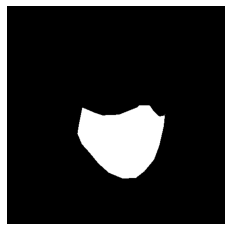

In [ ]:
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    mask = np.maximum(coco.annToMask(anns[i]), mask)
plt.axis('off')
plt.imshow(mask, cmap='gray')
# plt.savefig('mask2.png', bbox_inches='tight')
skimage.io.imsave('mask_skimage.png',mask)

In [ ]:
from PIL import Image 
import PIL 
  
# creating a image object (main image) 
# im1 = Image.open(mask) 

# data = Image.fromarray(mask)
# data.save('gfg_dummy_pic.png')

pil_img = Image.fromarray(mask.astype(np.uint8))
pil_img.save('gfg_dummy_pic.png')
# save a image using extension
# im1 = im1.save("mask.jpg")

In [ ]:
im1 = Image.open("/content/gfg_dummy_pic.png")
im1.show() 

In [ ]:
img = cv2.resize(mask.astype('uint8'), (28, 28))

In [ ]:
im1 = Image.open("/content/mask2.png")
print(im1.size)

im2 = Image.open("/content/OIP.jpeg")
print(im2.size)

(231, 231)
(474, 474)


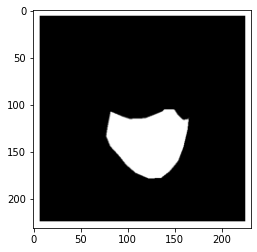

In [ ]:
im1.thumbnail(im2.size, Image.ANTIALIAS) 
imgplot = plt.imshow(im1)
# print(im1.size)

In [ ]:
size = 474, 474
im = Image.open("/content/mask2.png")
im.thumbnail(size, Image.ANTIALIAS)
im.save("mask_resized.png")

In [ ]:
im1 = Image.open("/content/mask_resized.png")
print(im1.size)

im2 = Image.open("/content/OIP.jpeg")
print(im2.size)

(231, 231)
(474, 474)


## CV2

In [ ]:
import cv2
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    mask = np.maximum(coco.annToMask(anns[i]), mask)
# plt.axis('off')
# plt.imshow(mask, cmap='gray')
img_cv2 = cv2.resize(mask.astype('uint8'), (474, 474)) # astype('uint8')
cv2.imwrite('mask_cv2_resized2.png', img_cv2)

True

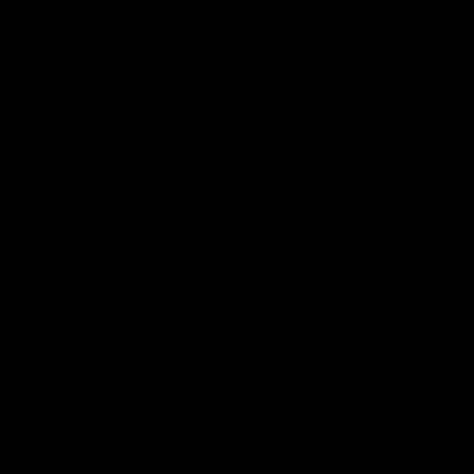

In [ ]:
Image.open("/content/mask_cv2_resized2.png")

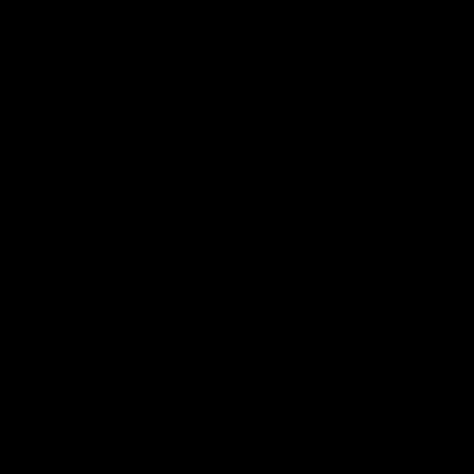

In [ ]:
from google.colab.patches import cv2_imshow
path = r'/content/mask_cv2_resized2.png'
# Using cv2.imread() method
img_c = cv2.imread(path)
# Displaying the image
cv2_imshow(img_c)

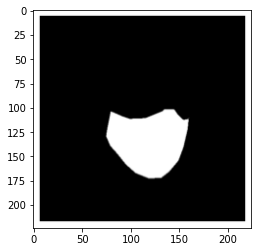

In [ ]:
from skimage.transform import rescale, resize, downscale_local_mean
import skimage.io

# read image
image = skimage.io.imread(fname="/content/mask2.png")

image_resized = resize(image, (224, 224),mode='edge',
                       anti_aliasing=True)
# plt.axis('off')
plt.imshow(image_resized, cmap='gray')
# plt.savefig('mask_resized_skimage.png', bbox_inches='tight')
skimage.io.imsave('mask_resized_skimage.png',image_resized)

In [ ]:
im1 = Image.open("/content/mask_resized_skimage.png")
print(im1.size)

im2 = Image.open("/content/OIP.jpeg")
print(im2.size)

(231, 231)
(474, 474)


# Rough

In [ ]:
!pip install coco-assistant

In [ ]:
!pip install coco-assistant==0.3.5

In [ ]:
from coco_assistant import COCO_Assistant

ValueError: ignored

In [ ]:
from coco_assistant import COCO_Assistant

# Specify image and annotation directories
img_dir = os.path.join(os.getcwd(), 'Images')
ann_dir = os.path.join(os.getcwd(), 'anno')

# Create COCO_Assistant object
cas = COCO_Assistant(img_dir, ann_dir)

ValueError: ignored

In [ ]:
!pip install datumaro

# Combine COCO Dataset jason files 

In [ ]:
!pip install pyodi

In [ ]:
import pyodi
from pyodi.apps.coco import coco_merge
coco_merge('/content/annotations.json', '/content/annotations_1.json', 'merged_file.json')

2021-10-04 20:02:52.274 | INFO     | pyodi.apps.coco.coco_merge:coco_merge:48 - Input 1: 1 images, 1 annotations
2021-10-04 20:02:52.281 | INFO     | pyodi.apps.coco.coco_merge:coco_merge:48 - Input 2: 1 images, 1 annotations
2021-10-04 20:02:52.283 | INFO     | pyodi.apps.coco.coco_merge:coco_merge:86 - Result: 2 images, 2 annotations


'merged_file.json'

# Masks dataset transforms and storing in a folder

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/prithwirajmitra/covid-face-mask-detection-dataset'

od.download(dataset_url)

100%|██████████| 207M/207M [00:01<00:00, 117MB/s]


In [ ]:
import os
DATA_DIR = '/content/covid-face-mask-detection-dataset/New Masks Dataset/Train'
print(os.listdir(DATA_DIR))
print(len(os.listdir(DATA_DIR+'/Mask')))

['Mask', 'Non Mask']
300


In [ ]:
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

In [ ]:
image_size = 256,256
ds = ImageFolder('/content/masked images', transform=T.Compose([
                       T.Resize(image_size),
                       T.ToTensor()]))

In [ ]:
len(ds)

300

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

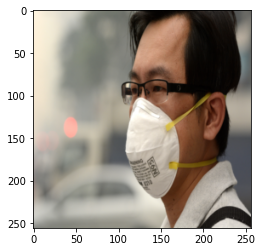

In [ ]:
img, _ = ds[0]
plt.imshow(img.permute(1,2,0))

# CelebA transforms and storing in a folder 

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/jessicali9530/celeba-dataset'

od.download(dataset_url)

100%|██████████| 1.33G/1.33G [00:40<00:00, 35.7MB/s]


In [ ]:
import os

In [ ]:
DATA_DIR = '/content/celeba-dataset/img_align_celeba'
print(os.listdir(DATA_DIR))
print(len(os.listdir(DATA_DIR+'/img_align_celeba')))

['img_align_celeba']
202599


In [ ]:
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

In [ ]:
image_size = 224
ds = ImageFolder(DATA_DIR, transform=T.Compose([
                       T.Resize(image_size),
                       T.ToTensor()]))

In [ ]:
len(ds)

202599

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

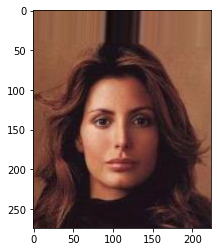

In [ ]:
from PIL import Image
# im = Image.open(ds[0])
# im.show()
img, _ = ds[8567]
plt.imshow(img)
# Image.show(ds[0])
# plt.imshow(img)
# print(img.shape)

In [ ]:
print(type(ds))

<class 'torchvision.datasets.folder.ImageFolder'>


In [ ]:
import torchvision

In [ ]:
# In transforms use ToTensor() to convert PIL to Tensors to use save_image
import torchvision
for i in range(100):
  img, _ = ds[i]
  torchvision.utils.save_image(img,f"/content/new_images_masked/generated_image{i}.png")

In [ ]:
# no need ToTensor() in Transforms
from skimage.transform import rescale, resize, downscale_local_mean
import skimage.io
import numpy as np
for i in range(20,31):
  img, _ = ds[i]
  # plt.imshow(img)
  image = np.asanyarray(img)
  skimage.io.imsave(f'/content/new_images/generated_image{i}.png',image)

In [ ]:
!zip -r /content/file.zip /content/new_images_masked

# create synthetic dataset

In [ ]:
!unzip /content/MaskTheFace-master.zip

Archive:  /content/MaskTheFace-master.zip
caf4d6ca2328f6f97c5f1947db4f03b3197fb62a
   creating: MaskTheFace-master/
  inflating: MaskTheFace-master/.gitattributes  
  inflating: MaskTheFace-master/.gitignore  
  inflating: MaskTheFace-master/LICENSE  
  inflating: MaskTheFace-master/_config.yml  
   creating: MaskTheFace-master/datasets/
 extracting: MaskTheFace-master/datasets/download_links.txt  
  inflating: MaskTheFace-master/faq.md  
   creating: MaskTheFace-master/images/
  inflating: MaskTheFace-master/images/MaskTheFace.png  
  inflating: MaskTheFace-master/images/angle.png  
  inflating: MaskTheFace-master/images/block_diag.png  
  inflating: MaskTheFace-master/images/brightness.png  
  inflating: MaskTheFace-master/images/colors.png  
 extracting: MaskTheFace-master/images/dataset.png  
  inflating: MaskTheFace-master/images/example1.png  
  inflating: MaskTheFace-master/images/face_recognition.png  
  inflating: MaskTheFace-master/images/intensities.png  
  inflating: MaskTh

In [ ]:
!pip install -r /content/MaskTheFace-master/requirements.txt

In [ ]:
!pip install dotmap

In [ ]:
# cd MaskTheFace
# # Generic
# python mask_the_face.py --path <path-to-file-or-dir> --mask_type <type-of-mask> --verbose --write_original_image

# Example
# !cd MaskTheFace-master
!python /content/MaskTheFace-master/mask_the_face.py --path '/content/generated_image18.png' --code 'KN95-#ffffff' --verbose --write_original_image


 __  __           _ _______ _          ______
|  \/  |         | |__   __| |        |  ____|
| \  / | __ _ ___| | _| |  | |__   ___| |__ __ _  ___ ___
| |\/| |/ _` / __| |/ / |  | '_ \ / _ \  __/ _` |/ __/ _ \
| |  | | (_| \__ \   <| |  | | | |  __/ | | (_| | (_|  __/
|_|  |_|\__,_|___/_|\_\_|  |_| |_|\___|_|  \__,_|\___\___|
Masking image file
/content/generated_image18.png
Faces found:  1
CFG :  DotMap(template='masks/templates/KN95.png', mask_a=(20, 47), mask_b=(410, 5), mask_c=(760, 55), mask_d=(75, 340), mask_e=(398, 600), mask_f=(671, 320))
Processing Done


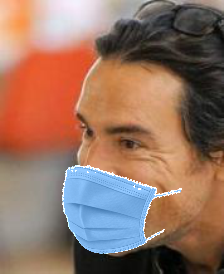

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/generated_image40_surgical.png")
cv2_imshow(img)

In [ ]:
    path_imggg = f"/content/MaskTheFace-master/{cfg.template}"

In [ ]:
!zip -r  /content/imp_file.zip /content/MaskTheFace-master

  adding: content/MaskTheFace-master/ (stored 0%)
  adding: content/MaskTheFace-master/mask_the_face.py (deflated 71%)
  adding: content/MaskTheFace-master/requirements.txt (deflated 31%)
  adding: content/MaskTheFace-master/.gitattributes (deflated 6%)
  adding: content/MaskTheFace-master/utils/ (stored 0%)
  adding: content/MaskTheFace-master/utils/point_the_mask.py (deflated 58%)
  adding: content/MaskTheFace-master/utils/aux_functions.py (deflated 75%)
  adding: content/MaskTheFace-master/utils/create_mask.py (deflated 70%)
  adding: content/MaskTheFace-master/utils/fit_ellipse.py (deflated 61%)
  adding: content/MaskTheFace-master/utils/display.txt (deflated 61%)
  adding: content/MaskTheFace-master/utils/__pycache__/ (stored 0%)
  adding: content/MaskTheFace-master/utils/__pycache__/__init__.cpython-37.pyc (deflated 21%)
  adding: content/MaskTheFace-master/utils/__pycache__/create_mask.cpython-37.pyc (deflated 43%)
  adding: content/MaskTheFace-master/utils/__pycache__/aux_funct